<a href="https://colab.research.google.com/github/https:/aurimas13/CodeAcademy-AI-Course/blob/main/Notebooks_Finished/Deep_Learning_5_Lecture_4_Demonstration_2_of_TensorFlow_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install d2l==1.0.0-beta0

  Using cached d2l-1.0.0b0-py3-none-any.whl (141 kB)
  Using cached gpytorch-1.9.1-py3-none-any.whl (250 kB)
  Using cached jupyter-1.0.0-py2.py3-none-any.whl (2.7 kB)
  Using cached gym-0.21.0.tar.gz (1.5 MB)
  Preparing metadata (setup.py) ... done
  Using cached cloudpickle-2.2.0-py3-none-any.whl (25 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 6.3 MB/s eta 0:00:0000:0100:01
  Using cached linear_operator-0.3.0-py3-none-any.whl (155 kB)
  Using cached qtconsole-5.4.0-py3-none-any.whl (121 kB)
  Using cached jupyter_console-6.4.4-py3-none-any.whl (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 MB 3.3 MB/s eta 0:00:0000:0100:02
  Using cached QtPy-2.3.0-py3-none-any.whl (83 kB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Created wheel for gym: filename=gym-0.21.0-py3-none-any.whl size=1616797 sha256=5acc46bf5e31ae5761b63288abbce5af06d4ef8df3a52e1ce4085142b1d73b40
  Stored in direct

# <b> Concise Implementation of Linear Regression


In [ ]:
import numpy as np
import tensorflow as tf
from d2l import tensorflow as d2l
import os
import warnings
warnings.filterwarnings('ignore')
os.environ['TF_CPP_MIN_LOG>LEVEL'] = '2'

## Defining the Model


In Keras, the fully connected layer is defined in the `Dense` class.
Since we only want to generate a single scalar output,
we set that number to 1.
It is worth noting that, for convenience,
Keras does not require us to specify
the input shape for each layer.
We don't need to tell Keras
how many inputs go into this linear layer.
When we first try to pass data through our model,
e.g., when we execute `net(X)` later,
Keras will automatically infer
the number of inputs to each layer.


In [ ]:
class LinearRegression(d2l.Module):  #@save
    def __init__(self, lr):
        super().__init__()
        self.save_hyperparameters()
        initializer = tf.initializers.RandomNormal(stddev=0.01)
        self.net = tf.keras.layers.Dense(1, kernel_initializer=initializer)

In the `forward` method, we just invoke the built-in `__call__` function of the predefined layers to compute the outputs.


In [ ]:
@d2l.add_to_class(LinearRegression)
def forward(self, X):
    return self.net(X)

## <b> Defining the Loss Function


The `MeanSquaredError` class returns the average loss over examples.


In [ ]:
@d2l.add_to_class(LinearRegression)  #@save
def loss(self, y_hat, y):
    fn = tf.keras.losses.MeanSquaredError()
    return fn(y, y_hat)

## <b> Defining the Optimization Algorithm


Minibatch SGD is a standard tool
for optimizing neural networks
and thus Keras supports it alongside a number of
variations on this algorithm in the `optimizers` module.


In [ ]:
@d2l.add_to_class(LinearRegression)
def configure_optimizer(self):
    return tf.keras.optimizers.SGD(self.lr)

## Training

We will use `Trainer` class to train & `fit` to fit the data.


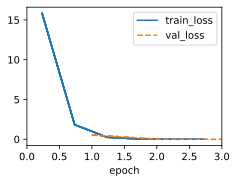

In [ ]:
model = LinearRegression(lr=0.03)
data = d2l.SyntheticRegressionData(w=tf.constant([2, -3.4]), b=4.2)
trainer = d2l.Trainer(max_epochs=3)
trainer.fit(model, data)

Below, we
[**compare the model parameters learned
by training on finite data
and the actual parameters**]
that generated our dataset.
To access parameters,
we access the weights and bias
of the layer that we need.


In [ ]:
@d2l.add_to_class(LinearRegression)  #@save
def get_w_b(self):
    return (self.get_weights()[0], self.get_weights()[1])

w, b = model.get_w_b()

In [ ]:
print(f'error in estimating w: {data.w - w.reshape(data.w.shape)}')
print(f'error in estimating b: {data.b - b}')

error in estimating w: [ 0.00719285 -0.00405192]
error in estimating b: [0.00833511]


## Summary


In TensorFlow, the `data` module provides tools for data processing,
the `keras` module defines a large number of neural network layers and common loss functions.
Moreover, the `initializers` module provides various methods for model parameter initialization.
Dimensionality and storage for networks are automatically inferred
(but be careful not to attempt to access parameters before they have been initialized).
